In [14]:
# Afficher les graphines dans la suite du code pas sur une nouvelle fenetre
%matplotlib inline

# Générer un nombre entier aléatoire
from random import randint, seed

# Ensemble d'élèments nommés
from enum import Enum

# Afficher les graphiques
import matplotlib.pyplot as plt

In [3]:
# Les stratégies possibles du joeur
# - Garder ou Changer son choix premier
class Strategie(Enum):
    CHANGER = 1
    GARDER  = 1

In [4]:
# Horloge pour initialiser
# le générateur nombre pseudo-aléatoire
seed()

def play_game(strategie):
    """Simule une partie du jeu de Monty Hall
    
    Cette fonction simule le choixde la porte par le participant,
    la supression d'une mauvaise par le présentateur et le choix
    final. Elle ne retourne que le resultat de la partie, puisque
    nous n'aurions besoin que de resultat pour effectuer nos calculs.
    
    Args:
        strategie (_type_): stratégie du joeurè
        
    Returns:
        bool: le joeur a-t-il gagné ou pas
    """
    
    portes = [0, 1, 2]
    
    bonne_porte = randint(0, 2)
    
    # choix du joeur
    premier_choix = randint(0, 2)
    
    # il bous reste deux portes
    portes.remove(premier_choix)
    
    # le présentateur élimine une porte
    if premier_choix == bonne_porte:
        portes.remove(portes[randint(0,1)])
    else:
        portes = [bonne_porte]
        
    deuxieme_choix = 0
    # le deuxième choix dépend de la stratégie du joeur
    if strategie == Strategie.CHANGER:
        deuxieme_choix = portes[0]
    elif strategie == Strategie.GARDER:
        deuxieme_choix = premier_choix
    else:
        raise ValueError("Cette valeur ne pas pris en charge")
    
    return deuxieme_choix == bonne_porte

### Simulation du jeu

In [5]:
play_game(Strategie.GARDER)

True

In [6]:
play_game(Strategie.CHANGER)

True

In [7]:
play_game(Strategie.CHANGER)

True

### Définition d'une fonction de test

In [8]:
def play(strategie, nb_tour):
    '''Simule une suite de tours du jeu.
    
    Cette fonction renvoie les résultats de plusieurs parties
    du jeu Monty Hall sous forme d'une liste de gains par le 
    joueur.
    
    Args:
        strategie (Strategie): La strategie du joueur
        nb_tours (int): Nombre de tours
        
    Returns:
        list: Liste des gains du joueurs à chaque partie
    '''
    
    return [1 if play_game(strategie) else 0 for i in range(nb_tour)]

**Test de resultat**

In [12]:
print("En changeant la porte, le joeur a gagné {} fois sur 10000".format(
                sum(play(Strategie.CHANGER, 10000))))
print("\nEn gardant la porte, le joeur a gangé {} fois sur 10000".format(
                sum(play(Strategie.GARDER, 10000))))

En changeant la porte, le joeur a gagné 6771 fois sur 10000

En gardant la porte, le joeur a gangé 6735 fois sur 10000


### Visualisation des resultats

##### Plot

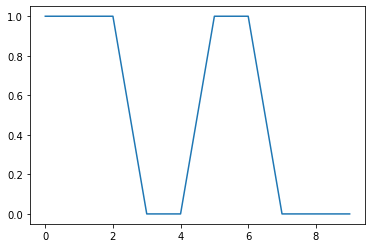

In [15]:
# Lorsque le joeur à changer de porte
plot = plt.plot(play(Strategie.CHANGER, 10))

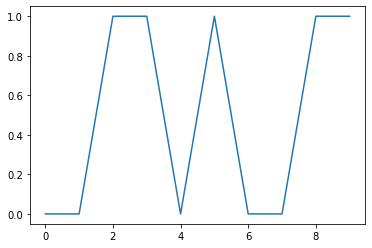

In [16]:
# Lorsque le joeur à garder sa porte initiale
plot = plt.plot(play(Strategie.GARDER, 10))

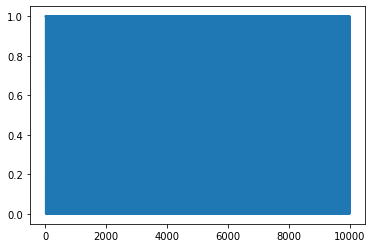

In [19]:
plt.plot(play(Strategie.CHANGER, 10000))

##### Scatter

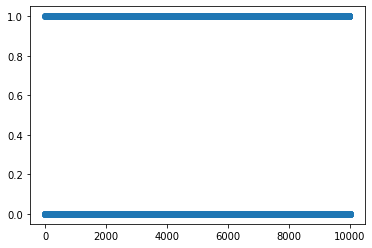

In [25]:
plt.scatter( range(10000), play(Strategie.CHANGER, 10000))

##### Bar

<BarContainer object of 2 artists>

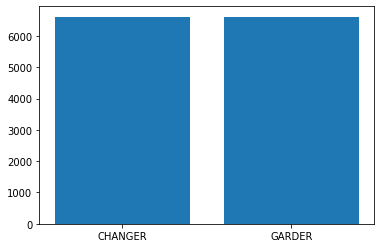

In [31]:
plt.bar([0, 1], [
    sum(play(Strategie.CHANGER, 10000)),
    sum(play(Strategie.GARDER, 10000))
], tick_label=['CHANGER', 'GARDER'])